In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

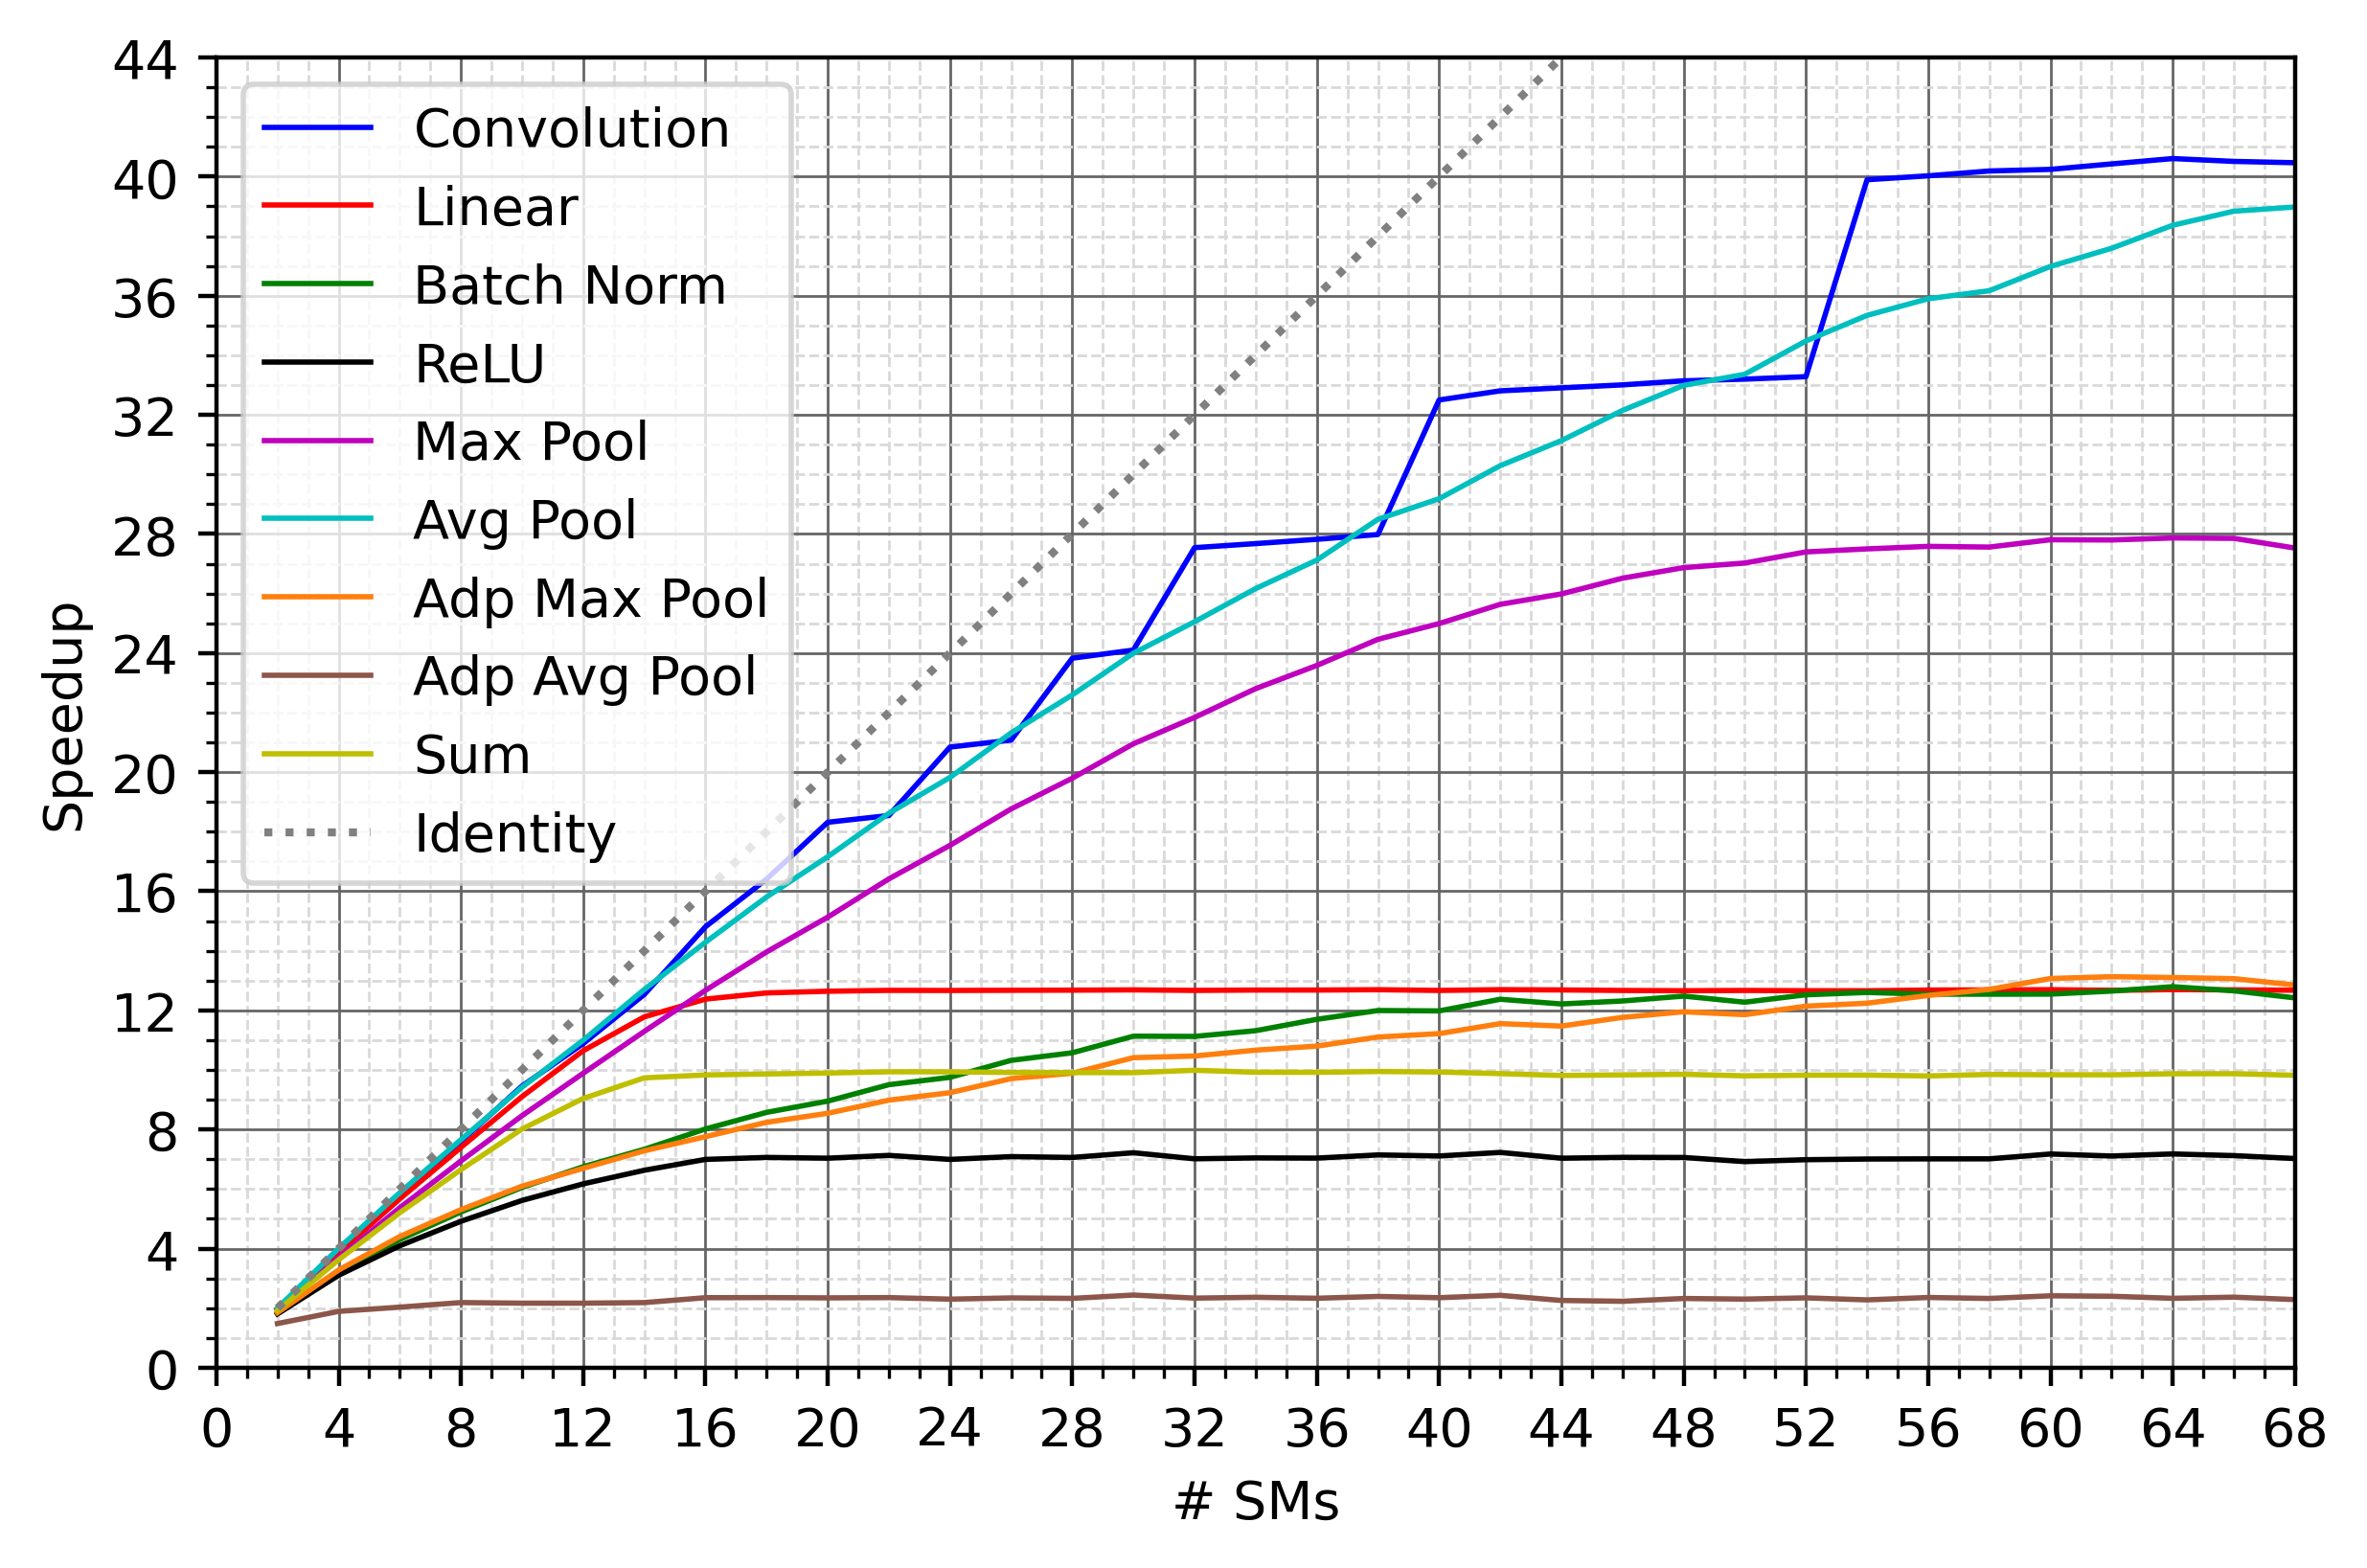

In [399]:
count = 8
x = []
y = [[] for i in range(9)]
su = [[] for i in range(9)]

with open('/home/amir/repos/FGPRS/results/speedup.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, count + 1):
            y[i - 1].append(float(row[i]))

with open('/home/amir/repos/FGPRS/results/speedup2.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        y[8].append(float(row[5]))

def toSpeedup(x):
    y = []
    f = min(math.pow(2 * x[0] / x[1] * x[0] / x[1], 1 / 3), 2) * x[0]
#     print(x[0] / x[1])
#     print(x[1] / x[3])
#     print(f / x[0])
#     print('-----')
    for d in x:
        y.append(f / d)
    
    return y

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

for i in range(count + 1):
    su[i] = toSpeedup(y[i])

plt.plot(x, su[0], color='b', linewidth=1)
plt.plot(x, su[1], color='r', linewidth=1)
plt.plot(x, su[2], color='g', linewidth=1)
plt.plot(x, su[3], color='k', linewidth=1)
plt.plot(x, su[4], color='m', linewidth=1)
plt.plot(x, su[5], color='c', linewidth=1)
plt.plot(x, su[6], color='tab:orange', linewidth=1)
plt.plot(x, su[7], color='tab:brown', linewidth=1)
plt.plot(x, su[8], color='y', linewidth=1)

id = []
for i in range(2, 69, 3):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, 44)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.85', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()
plt.legend([
    'Convolution', 'Linear', 'Batch Norm', 'ReLU',
    'Max Pool', 'Avg Pool', 'Adp Max Pool', 'Adp Avg Pool',
    'Sum', 'Identity'])
plt.show()

[6113.587,
 3107.198,
 2109.586,
 1609.419,
 1311.274,
 1122.65,
 1013.651,
 965.365,
 948.633,
 944.487,
 943.342,
 943.562,
 943.712,
 942.707,
 943.182]

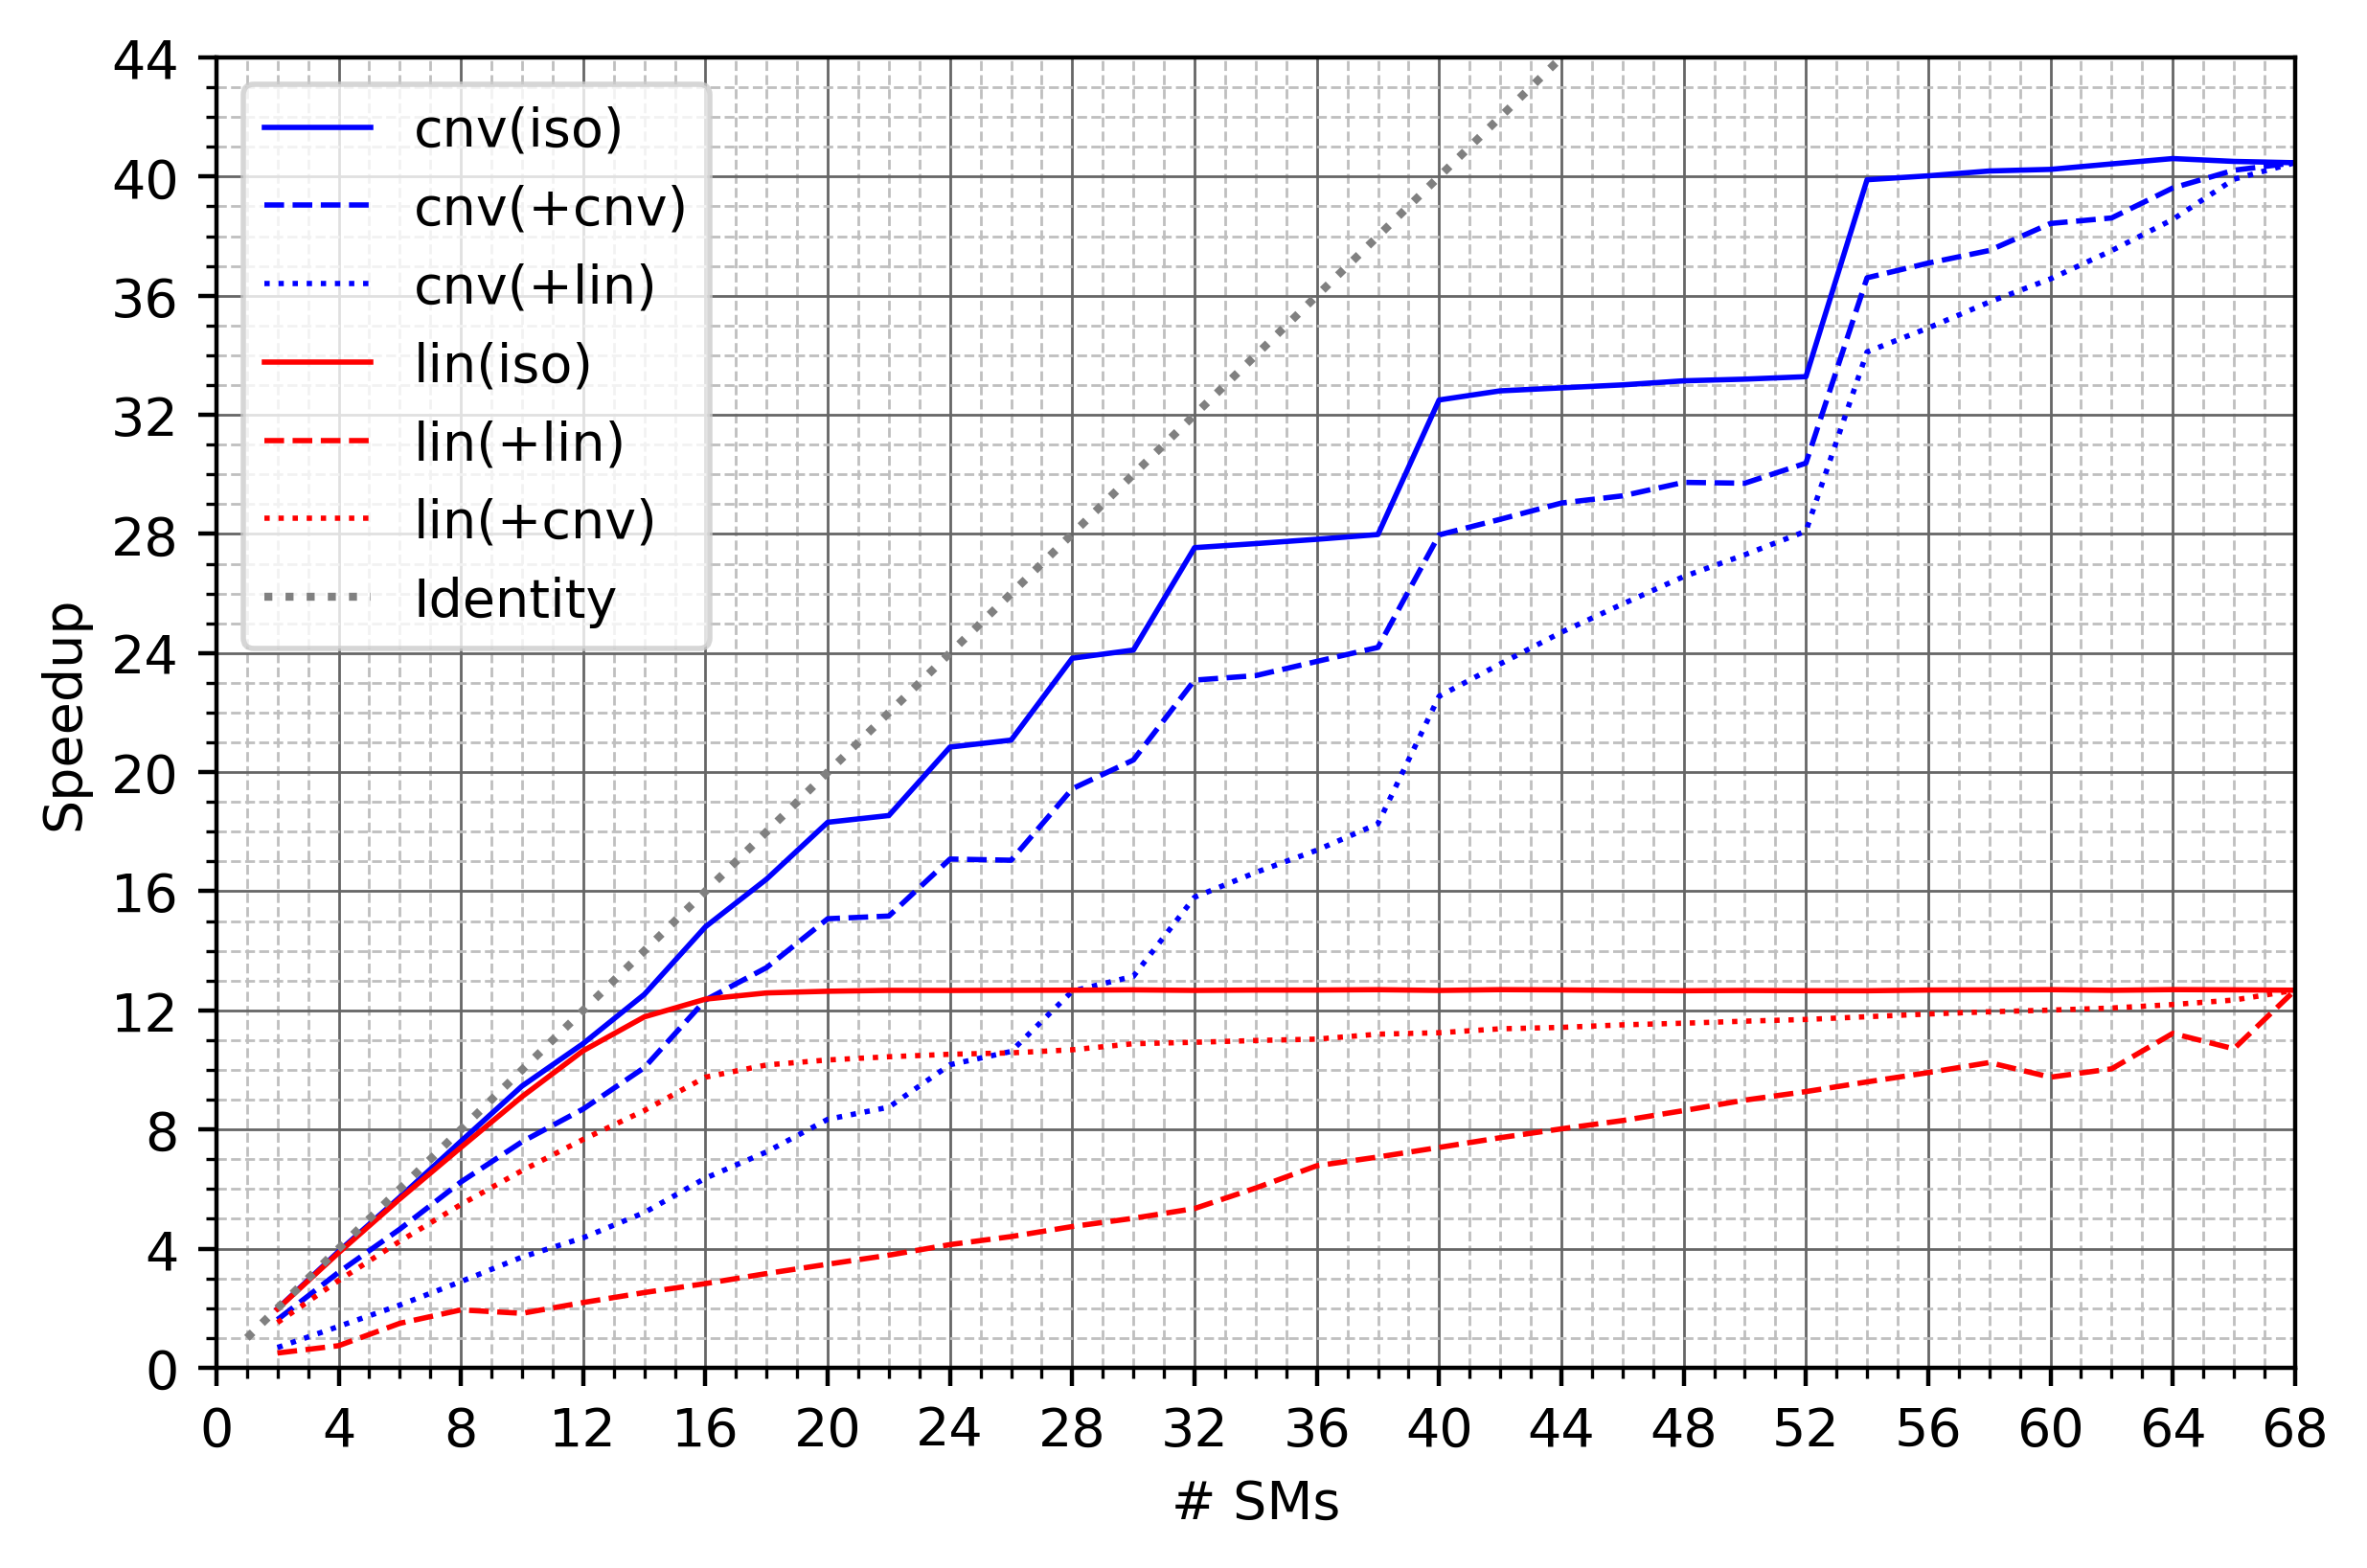

In [396]:
import pandas as pd

m_index = 1

init = [y[0][0] * su[0][0], y[m_index][0] * su[m_index][0], y[0][0] * su[0][0], y[m_index][0] * su[m_index][0]]

x = []
y2 = [[] for i in range(4)]
su2 = [[] for i in range(4)]

csvData = pd.read_csv("/home/amir/repos/FGPRS/results/concurrency.csv")

csvData.sort_values(csvData.columns[0], axis=0, inplace=True)
csvData.to_csv ("/home/amir/repos/FGPRS/results/concurrency2.csv", index = None, header=True)

with open('/home/amir/repos/FGPRS/results/concurrency2.csv', 'r') as file:
    dummy = csv.reader(file)
    
    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, 5):
            y2[i - 1].append(float(row[i]))
    
x.append(68)
y2[0].append(y[0][-1])
y2[1].append(y[m_index][-1])
y2[2].append(y[0][-1])
y2[3].append(y[m_index][-1])

def toSpeedup(x, init):
    y = []
    for d in x:
        y.append(init / d)
    
    return y

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

for i in range(4):
    su2[i] = toSpeedup(y2[i], init[i])

plt.plot(x, su[0], color='b', linewidth=1)
plt.plot(x, su2[0], color='b', linestyle='dashed', linewidth=1)
plt.plot(x, su2[2], color='b', linestyle='dotted', linewidth=1)
plt.plot(x, su[m_index], color='r', linewidth=1)
plt.plot(x, su2[1], color='r', linestyle='dashed', linewidth=1)
plt.plot(x, su2[3], color='r', linestyle='dotted', linewidth=1)

id = [1]
for i in range(2, 69, 2):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, 44)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.75', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()
plt.legend([
    'cnv(iso)', 'cnv(+cnv)', 'cnv(+lin)', 'lin(iso)', 'lin(+lin)', 'lin(+cnv)',
    'Identity'])
plt.show()

In [296]:
y[0]

[31566.256,
 15977.855,
 10883.54,
 8135.111,
 6622.38,
 5605.512,
 5064.486,
 4184.04,
 4050.427,
 3589.153,
 3145.698,
 3077.265,
 2659.406,
 2613.011,
 2567.689,
 2218.037,
 2178.642,
 2153.452,
 2126.708,
 2108.78,
 2083.585,
 1752.539,
 1729.133,
 1718.753,
 1703.327,
 1695.251,
 1679.505,
 1672.13,
 1659.968,
 1653.858,
 1642.339,
 1315.741,
 1307.959,
 1301.979]

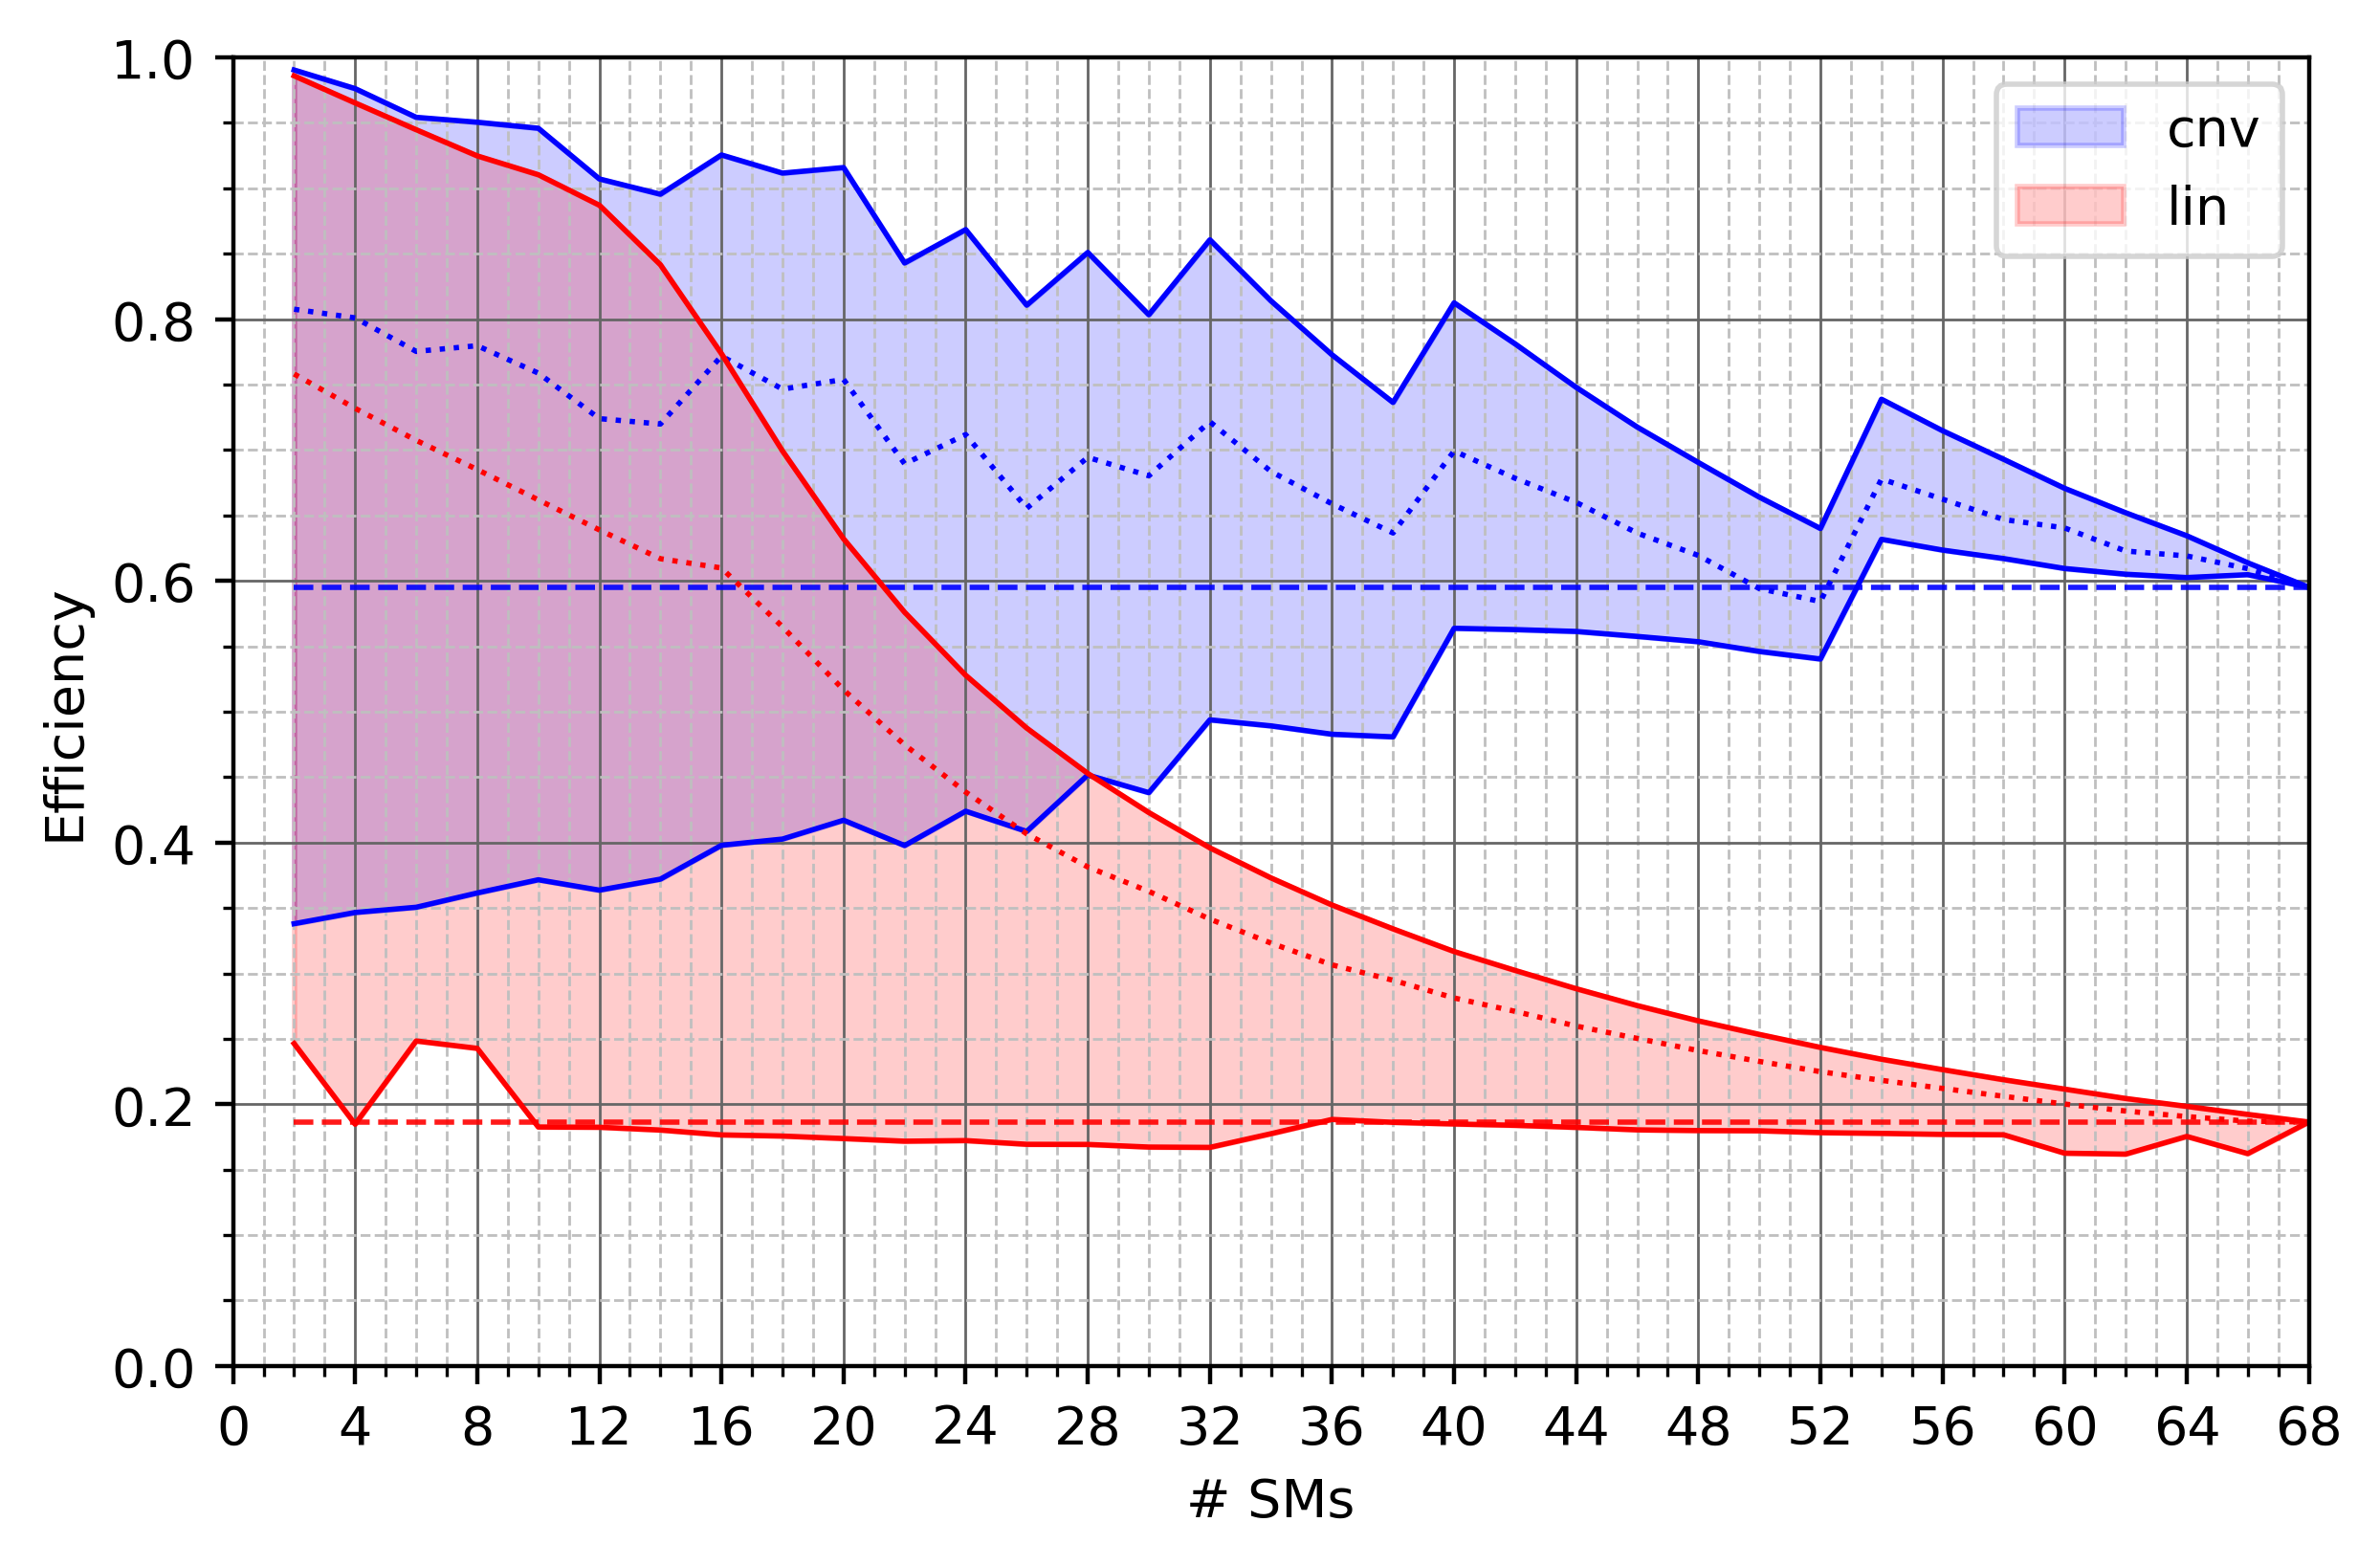

In [397]:
ef1 = []
eff1 = []
ef2 = []
eff2 = []

ef1.append(np.array(su[0]) / np.array(x))
ef1.append(np.array(np.minimum(su2[0], su2[2])) / np.array(x))
eff1.append(np.array(su2[0]) / np.array(x))
eff1.append(np.array(su2[2]) / np.array(x))

ef2.append(np.array(su[m_index]) / np.array(x))
ef2.append(np.array(np.minimum(su2[1], su2[3])) / np.array(x))
eff2.append(np.array(su2[1]) / np.array(x))
eff2.append(np.array(su2[3]) / np.array(x))

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

efx1 = np.ones((1, 34)) * su[0][33] / 68
efm1 = (np.array(ef1[0]) + np.array(ef1[1])) / 2

efx2 = np.ones((1, 34)) * su[1][33] / 68
efm2 = (np.array(ef2[0]) + np.array(ef2[1])) / 2

plt.plot(x, ef1[0], color='b', linewidth=1, label='_nolegend_')
plt.plot(x, ef1[1], color='b', linewidth=1, label='_nolegend_')
plt.plot(x, eff1[0], color='b', linestyle='dotted', linewidth=1, label='_nolegend_')
plt.fill_between(x, ef1[0], ef1[1], color='b', alpha=0.2)
plt.plot(x, efx1[0], color='b', linewidth=1, linestyle='dashed', alpha=0.9, label='_nolegend_')
# plt.plot(x, efm1, color='b', linewidth=1, linestyle='dashdot')

plt.plot(x, ef2[0], color='r', linewidth=1, label='_nolegend_')
plt.plot(x, ef2[1], color='r', linewidth=1, label='_nolegend_')
plt.plot(x, eff2[1], color='r', linestyle='dotted', linewidth=1, label='_nolegend_')
plt.fill_between(x, ef2[0], ef2[1], color='r', alpha=0.2)
plt.plot(x, efx2[0], color='r', linewidth=1, linestyle='dashed', alpha=0.9, label='_nolegend_')
# plt.plot(x, efm2, color='r', linewidth=1, linestyle='dashdot')

# plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
# plt.yticks(range(0, 1, 0.1))

plt.xlim(0, 68)
plt.ylim(0, 1)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.75', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Efficiency')

plt.minorticks_on()
plt.legend(['cnv', 'lin'])
plt.show()

In [398]:
count = 8
x = []
y = [[] for i in range(9)]
su = [[] for i in range(9)]

with open('/home/amir/repos/FGPRS/results/speedup.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, count + 1):
            y[i - 1].append(float(row[i]))

with open('/home/amir/repos/FGPRS/results/speedup2.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        y[8].append(float(row[5]))

def toSpeedup(x):
    y = []
    f = min(math.pow(2 * x[0] / x[1] * x[0] / x[1], 1 / 3), 2) * x[0]
#     print(x[0] / x[1])
#     print(x[1] / x[3])
#     print(f / x[0])
#     print('-----')
    for d in x:
        y.append(f / d)
    
    return y

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

for i in range(count + 1):
    su[i] = toSpeedup(y[i])

plt.plot(x, su[0], color='b', linewidth=1)
plt.plot(x, su[1], color='r', linewidth=1)
plt.plot(x, su[2], color='g', linewidth=1)
plt.plot(x, su[3], color='k', linewidth=1)
plt.plot(x, su[4], color='m', linewidth=1)
plt.plot(x, su[5], color='c', linewidth=1)
plt.plot(x, su[6], color='tab:orange', linewidth=1)
plt.plot(x, su[7], color='tab:brown', linewidth=1)
plt.plot(x, su[8], color='y', linewidth=1)

id = []
for i in range(2, 69, 3):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, 44)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.85', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()
plt.legend([
    'Convolution', 'Linear', 'Batch Norm', 'ReLU',
    'Max Pool', 'Avg Pool', 'Adp Max Pool', 'Adp Avg Pool',
    'Sum', 'Identity'])
plt.show()

array([0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271, 0.59508271,
       0.59508271, 0.59508271, 0.59508271, 0.59508271])